# Scenario: Analyzing E-commerce Customer Behavior for Repeat Purchase Likelihood

- As an aspiring data analyst in our company’s analytics team, you have been tasked with producing a comprehensive analytical report that can be confidently presented to a Chief Data Officer (CDO) or Head of Analytics.

- Your goal is to demonstrate your ability to explore, clean, and analyze real-world business data to uncover actionable insights that help the company better understand its customers and drive strategic decisions — specifically around repeat purchase behavior.

- For this exercise, you have chosen the Online Retail Dataset — a transactional dataset containing approximately 500,000 records of purchases made between December 2010 and December 2011 by customers of a UK-based online retail store. The data includes detailed invoice-level information:
1. Invoice Number
2. Stock Code (Product ID)
3. Description
4. Quantity Purchased
5. Invoice Date
6. Unit Price
7. Customer ID
8. Country

# Focus
- The focus of your analysis is to identify factors that influence whether customers make repeat purchases, understand the buying behavior across different segments, and test hypotheses about patterns that can inform customer retention strategies.

# Deliverables
- Your final deliverable will demonstrate your full analytics workflow — from data summary and cleaning to exploratory analysis, hypothesis formulation, and statistical testing — and conclude with clear recommendations that a senior business audience can act on.

# Deliverables Overview
- Below is a structured outline of what your PDF report will include:

# Data Summary
- A clear overview of:
1. Total number of rows (~500,000 transactions).
2. Number of unique customers.
3. Number of unique products.
4. Key variables with data types.
5. Possible target variable: Repeat Purchase Flag (derived by grouping by Customer ID and counting purchases).

# Data Exploration Plan
- A logical plan detailing:
1. Key business questions:
2. What percentage of customers make repeat purchases?
3. How does spend differ between repeat and one-time buyers?
4. Which countries/products contribute most to repeat sales?
5. Planned segmentation: by country, order value, product category.
6. Visualizations to use: histograms, bar charts, cohort plots.

# Exploratory Data Analysis (EDA) Discussion
- Detailed discussion supported by visuals:
1. Distribution of purchases per customer.
2. Average spend and quantity purchased.
3. Top products and top markets.
4. Churn risk patterns: which segments have the lowest repeat purchase rates.

# Data Cleaning & Feature Engineering
- Explanation and screenshots for:
1. Handling missing Customer IDs (drop or flag).
2. Dropping duplicates, invalid rows (e.g., negative quantities).
3. Creating TotalPrice = Quantity × UnitPrice.
4. Deriving RepeatBuyer flag.
5. Encoding categorical variables if needed.
6. Visual checks to verify clean data.

# Key Findings and Insights
- Concise summary:
1. What % of revenue comes from repeat buyers.

# Hypotheses
1. Customers who spend more per order are more likely to make repeat purchases.
2. Customers in the UK are more likely to buy again than customers in other countries.
3. Large order quantities increase the likelihood of repeat purchasing.

# Significance Test
1. Two-sample t-test comparing average spend for repeat vs non-repeat buyers.
2. State null & alternative hypotheses.
3. Show test statistic, p-value, interpretation.
4. Explain business impact of rejecting or accepting the null.

# Conclusion & Next Steps
- Key takeaways for the senior audience.
- Recommendations:
1. How to target high-value segments.
2. Next steps: deeper modeling, loyalty program design.
3. How these insights could feed into predictive models or marketing strategies.

# Data Exploration and Summary Analysis

In [82]:
# Necessary Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind  
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
# Total Rows
print("Total Rows:", df.shape[0])

Total Rows: 541909


In [4]:
# Total Columns
print("Total Columns:", df.shape[1])

Total Columns: 8


In [5]:
# How many unique Customers do I have
customers =  df['CustomerID'].nunique()
print("Unique Customers: ", customers)

Unique Customers:  4372


In [6]:
# How many Unique Products do I have
products = df['StockCode'].nunique()
print("Unique Products: ", products)

Unique Products:  4070


In [7]:
# Data Types
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


# Repeat Buyes 
- Create a repeat purchase flag variable
- Group by Customer id to find unique customer
- Find the unique invoices

In [8]:
# Group by CustomerID and count unique invoices
invoice = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Create the flag, use lamda function if X > 1 = 1 else 0
invoice['RepeatBuyer'] = invoice['InvoiceNo'].apply(lambda x: 1 if x > 1 else 0)

print("Repeat Buyers Sample:\n")
print(invoice.head())

Repeat Buyers Sample:

   CustomerID  InvoiceNo  RepeatBuyer
0     12346.0          2            1
1     12347.0          7            1
2     12348.0          4            1
3     12349.0          1            0
4     12350.0          1            0


# Percentage Of Repeat Buyers

In [9]:
# take the mean between the 1 and 0 
#  [0, 1, 1, 0, 1] example
# mean = (0+1+1+0+1)/5 = 0.6 → 60% repeat buyers
repeat_buyers = invoice['RepeatBuyer'].mean() * 100

# This is a clean, fast way to get an important KPI without having to count manually.
print(f" % of Repeat Buyers: {repeat_buyers:.2f}%")

 % of Repeat Buyers: 69.97%


# Data Exploration Plan
- The goal of this Data Exploration Plan is to systematically investigate the Online Retail dataset to understand customer buying behavior, with a specific focus on repeat purchases.
- We aim to answer key business questions that will inform actionable strategies for customer retention, targeted marketing, and revenue growth.

# Business Questions
1. What percentage of customers make repeat purchases?
2. How does average spend differ between repeat buyers and one-time buyers?
3. Which countries and product categories generate the highest repeat sales?
4. Are there noticeable differences in order value and quantity between repeat vs non-repeat segments?
6. How does purchasing behavior evolve over time? 

# Planned Segmentation
- Country: To identify regional buying trends and high-value markets.
- Order Value: To detect high-spend customers.
- Product Category: To understand which products drive repeat purchases.
- Customer Tenure: By first purchase date to study cohort behavior over time.



In [10]:
# Total Money Spend for each Product Unit Price X Quantity
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

In [11]:
# Merge on the DF, Keep every row from the main DF and match the repeat buyers if there is a match
# If for some reason a transaction has a CustomerID that doesn’t exist in invoice_counts 
# (e.g., missing CustomerID → NaN),  still keep the transaction, and the flag will be NaN.
df = df.merge(invoice[['CustomerID', 'RepeatBuyer']], on='CustomerID', how='left')


# How much customers Spend by order , Repeat VS Non Repeat Buyers (one time customers)

In [12]:
customer_spend = df.groupby(['CustomerID', 'RepeatBuyer'])['TotalSpend'].sum().reset_index()

customer_spend

,CustomerID,RepeatBuyer,TotalSpend
0,12346.0,1.0,0.00
1,12347.0,1.0,4310.00
2,12348.0,1.0,1797.24
3,12349.0,0.0,1757.55
4,12350.0,0.0,334.40
...,...,...,...
4367,18280.0,0.0,180.60
4368,18281.0,0.0,80.82
4369,18282.0,1.0,176.60
4370,18283.0,1.0,2094.88


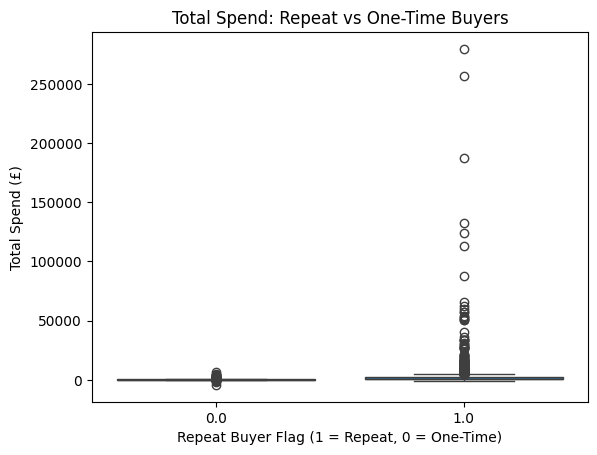

In [13]:
# Box Plot 
sns.boxplot(x='RepeatBuyer', y='TotalSpend', data=customer_spend)
plt.title('Total Spend: Repeat vs One-Time Buyers')
plt.xlabel('Repeat Buyer Flag (1 = Repeat, 0 = One-Time)')
plt.ylabel('Total Spend (£)')
plt.show()

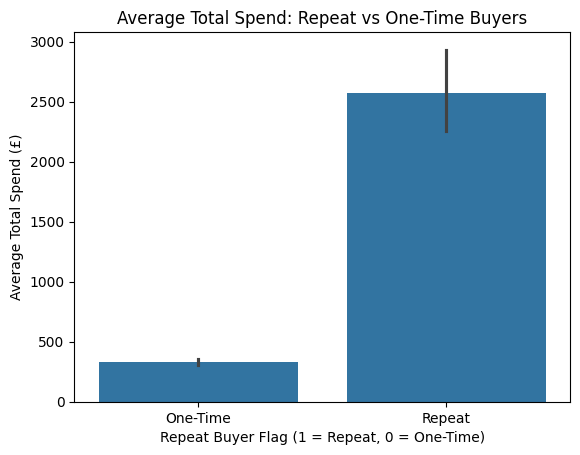

In [16]:
# Bar Plot
sns.barplot(x='RepeatBuyer', y='TotalSpend', data=customer_spend, estimator='mean')
plt.title('Average Total Spend: Repeat vs One-Time Buyers')
plt.xlabel('Repeat Buyer Flag (1 = Repeat, 0 = One-Time)')
plt.ylabel('Average Total Spend (£)')
plt.xticks([0, 1], ['One-Time', 'Repeat'])
plt.show()

# Which countries generate the most revenue

In [ ]:
# Country by revenue (Top 5 countries)
country_revenues = df.groupby('Country')['TotalSpend'].sum().sort_values(ascending=False).head(5)
country_revenues

Country
United Kingdom    8187806.364
Netherlands        284661.540
EIRE               263276.820
Germany            221698.210
France             197403.900
Name: TotalSpend, dtype: float64

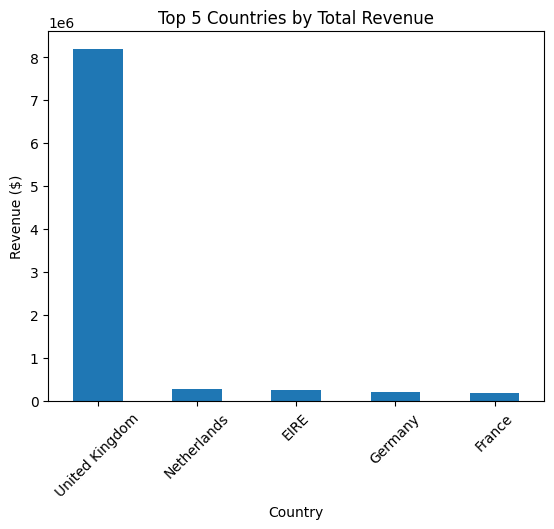

In [24]:
country_revenues.plot(kind='bar')
plt.title('Top 5 Countries by Total Revenue')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()

# Top Products by Sales

In [23]:
product_revenues = df.groupby('Description')['TotalSpend'].sum().sort_values(ascending=False).head(5)

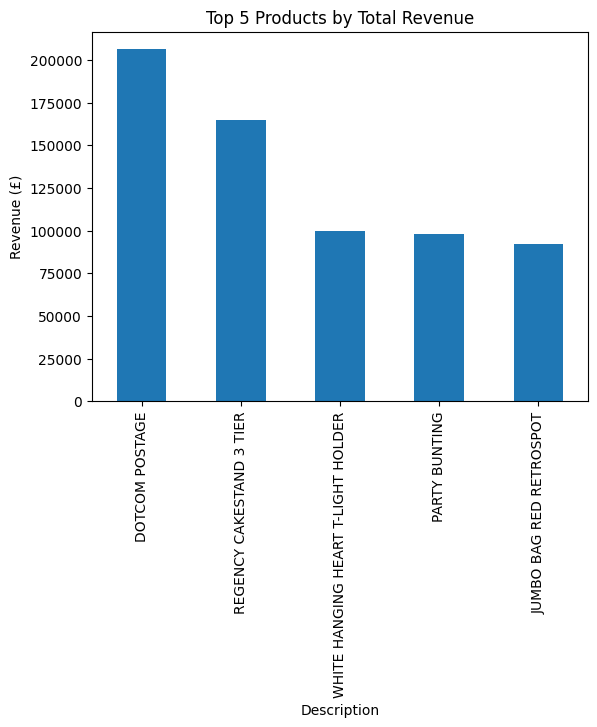

In [32]:
product_revenues.plot(kind='bar')
plt.title('Top 5 Products by Total Revenue')
plt.ylabel('Revenue (£)')
plt.xticks(rotation=90)
plt.show()

# Exploratory Data Analysis Topics Number 2

# Distribution of purchases per customer
- How many products customers buy

In [34]:
# Count of transactions per customer, here we count the unique elements
customer_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique()
customer_transactions

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     3
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4372, dtype: int64

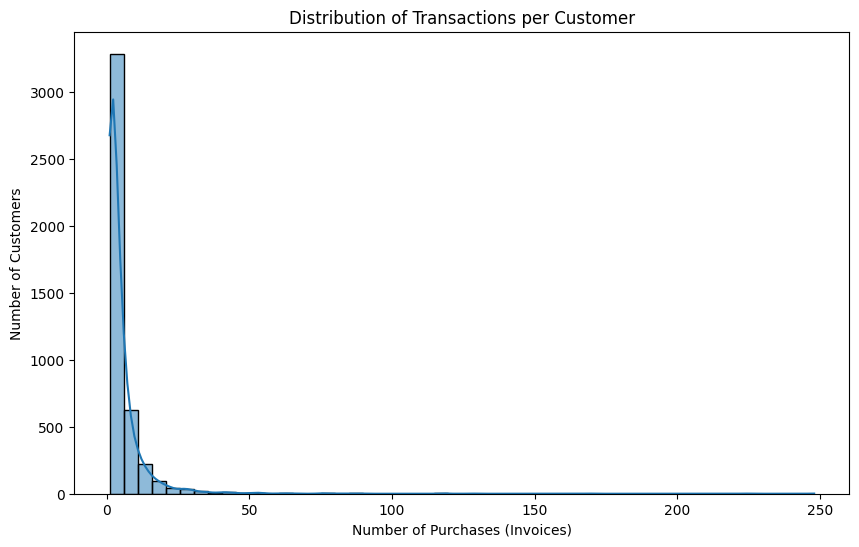

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_transactions, bins=50, kde=True)
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Purchases (Invoices)')
plt.ylabel('Number of Customers')
plt.show()

# How much on average out customers spend and the quantity they buy

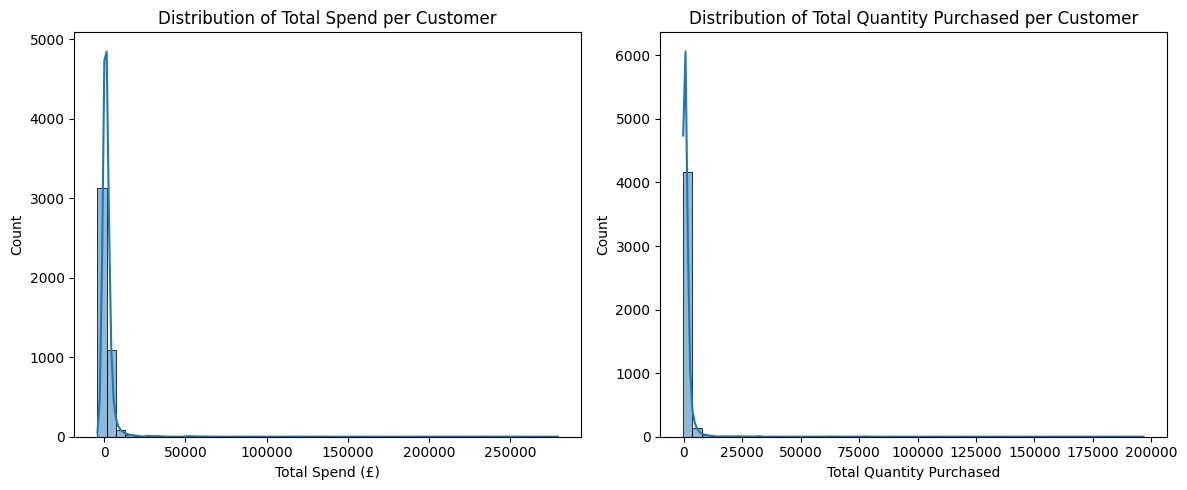

In [40]:
customer_summary = df.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'Quantity': 'sum',
    'RepeatBuyer': 'max'
}).reset_index()

plt.figure(figsize=(12, 5))


# Spend
plt.subplot(1, 2, 1)
sns.histplot(customer_summary['TotalSpend'], bins=50, kde=True)
plt.title('Distribution of Total Spend per Customer')
plt.xlabel('Total Spend (£)')

# Quantity
plt.subplot(1, 2, 2)
sns.histplot(customer_summary['Quantity'], bins=50, kde=True)
plt.title('Distribution of Total Quantity Purchased per Customer')
plt.xlabel('Total Quantity Purchased')

plt.tight_layout()
plt.show()

# Find Patterns For customer who are going to leave (Churn Patterns)

In [41]:
# Calculate the rate of repeat buyers by country
country_repeat = df.groupby('Country')['RepeatBuyer'].mean().sort_values()

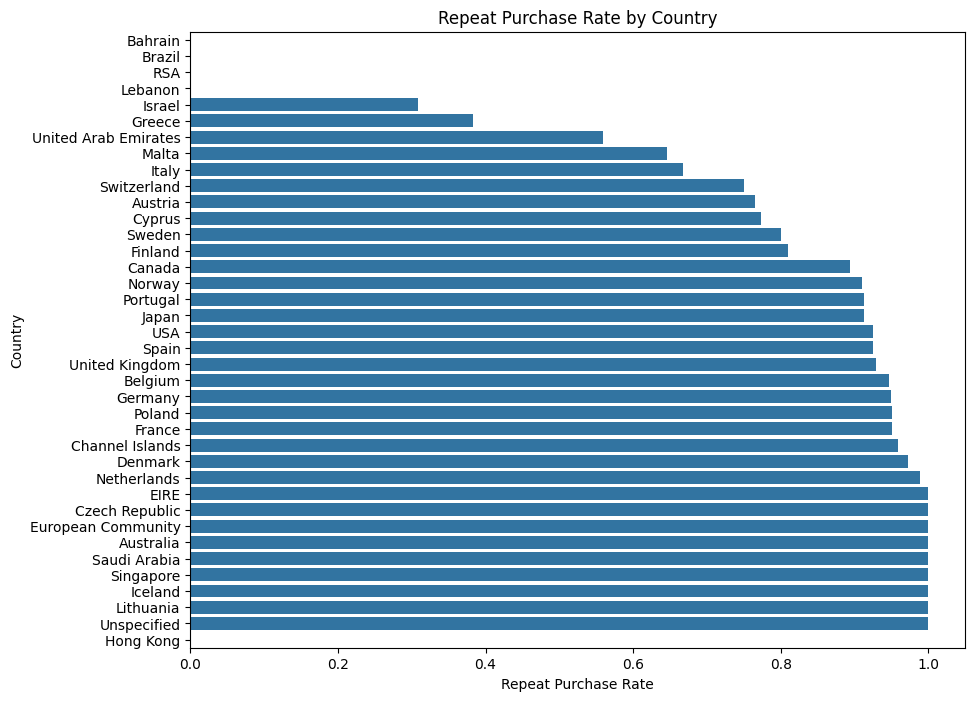

In [42]:
plt.figure(figsize=(10, 8))
sns.barplot(x=country_repeat.values, y=country_repeat.index)
plt.title('Repeat Purchase Rate by Country')
plt.xlabel('Repeat Purchase Rate')
plt.ylabel('Country')
plt.show()


# Insight Charts
- Percentage of revenue by repeat customers

In [52]:
revenue_buyers = df.groupby('RepeatBuyer')['TotalSpend'].sum().reset_index()


In [53]:
total_revenue = revenue_buyers['TotalSpend'].sum()

In [54]:
revenue_buyers['RevenuePercent'] = (revenue_buyers['TotalSpend'] / total_revenue) * 100

In [55]:
print("Revenue by RepeatBuyerFlag:")
print(revenue_buyers)


Revenue by RepeatBuyerFlag:
   RepeatBuyer   TotalSpend  RevenuePercent
0          0.0   433784.671         5.22628
1          1.0  7866281.143        94.77372


In [56]:
# Add readable labels
revenue_buyers['BuyerType'] = revenue_buyers['RepeatBuyer'].apply(
    lambda x: 'Repeat Buyer' if x == 1 else 'One-Time Buyer'
)

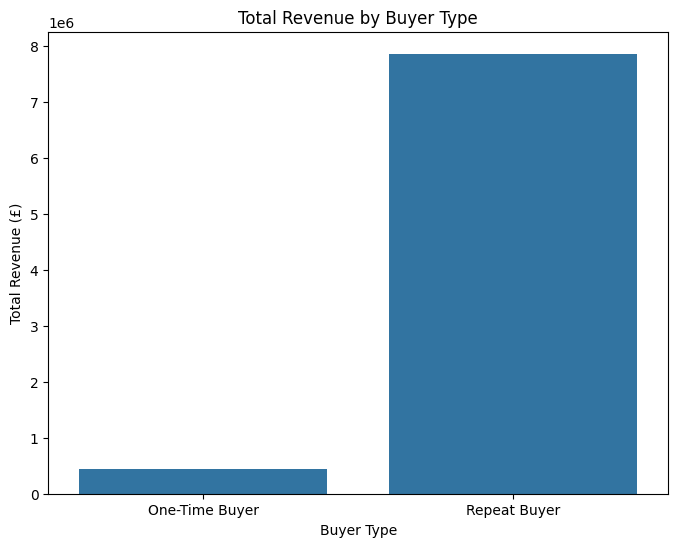

In [57]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='BuyerType', y='TotalSpend', data=revenue_buyers)

plt.title('Total Revenue by Buyer Type')
plt.xlabel('Buyer Type')
plt.ylabel('Total Revenue (£)')
plt.show()

# Hypothesis Testing 1
- Marketing Claim : Customers who spend more per order are more likely to make repeat purchases
- Null Hypothesis (H0): The average order value per customer is the same for repeat buyers and one-time buyers.
- Alternative Hypothesis (H1): Repeat buyers have a higher average order value than one-time buyers.

# Steps:
1. Calculate the average order value for each customer. (How much on average each customer spends)
2. Add the RepeatBuyer(Flag) for each customer
3.  Split into repeat vs. one-time groups (Customers who buy once vs customers who buy more than once)
4. Run a two-sample t-test.

In [60]:
# Calculate the Average Order and total invoices per customer
customer_orders = df.groupby('CustomerID').agg({
    'TotalSpend': 'sum',
    'InvoiceNo': 'nunique',
    'RepeatBuyer': 'max'
}).reset_index()


In [61]:
# Customer Average Order Value
customer_orders['AverageOrderValue'] = customer_orders['TotalSpend'] / customer_orders['InvoiceNo']


In [62]:
customer_orders

,CustomerID,TotalSpend,InvoiceNo,RepeatBuyer,AverageOrderValue
0,12346.0,0.00,2,1.0,0.000000
1,12347.0,4310.00,7,1.0,615.714286
2,12348.0,1797.24,4,1.0,449.310000
3,12349.0,1757.55,1,0.0,1757.550000
4,12350.0,334.40,1,0.0,334.400000
...,...,...,...,...,...
4367,18280.0,180.60,1,0.0,180.600000
4368,18281.0,80.82,1,0.0,80.820000
4369,18282.0,176.60,3,1.0,58.866667
4370,18283.0,2094.88,16,1.0,130.930000


In [65]:
# Split into repeat and one time
repeat_buyers = customer_orders[customer_orders['RepeatBuyer'] == 1]['AverageOrderValue']
one_time_buyers = customer_orders[customer_orders['RepeatBuyer'] == 0]['AverageOrderValue']



In [66]:
print(f"Average Order Value (Repeat Buyers): £{repeat_buyers.mean():.2f}")
print(f"Average Order Value (One-Time Buyers): £{one_time_buyers.mean():.2f}")

Average Order Value (Repeat Buyers): £309.66
Average Order Value (One-Time Buyers): £330.38


In [68]:
#  Perform two-sample t-test
t_stat, p_value = ttest_ind(repeat_buyers, one_time_buyers, equal_var=False)  # Welch's t-test is safer

In [69]:
print("Two-Sample T-Test:")
print(f"Test statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Two-Sample T-Test:
Test statistic: -1.5119
P-value: 0.1307


#### Add code interpretations
- In this sample, the difference in average order value between repeat buyers and one-time buyers is not statistically significant at the 5% level.
- We can’t confidently say that spending more per order is linked to higher repeat purchase likelihood.

In [71]:
alpha = 0.05

if p_value < alpha:
    print("Result: Reject the null hypothesis — there IS a significant difference.")
    print("Interpretation: Customers who spend more per order are more likely to make repeat purchases.")
else:
    print(" Result: Fail to reject the null hypothesis — no significant difference found.")

 Result: Fail to reject the null hypothesis — no significant difference found.


# Hypothesis Statement 2: 
- Sales Clain : Customers in the UK are more likely to buy again than customers in other countries.
- Null hypothesis (H₀): The repeat purchase rate for UK customers is the same as for non-UK customers.
- Alternative hypothesis (H₁): The repeat purchase rate for UK customers is higher than for non-UK customers.


# Process
- UK repeat buyer rate vs. non-UK repeat buyer rate.
- Use a two-proportion z-test

1. Label each customer as UK or Non-UK
2. Get the number of repeat buyers in each group
3. Get the total number of customers in each group
4. Run the proportion test


In [ ]:
# Create the invoce dataset
invoice = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'Country': 'first'
}).reset_index()

In [88]:
# Create the repeat buyer flag from invoices
invoice['RepeatBuyerFlag'] = invoice['InvoiceNo'].apply(lambda x: 1 if x > 1 else 0)

In [89]:
# Separate UK vs Non-UK
uk_customers = invoice[invoice['Country'] == 'United Kingdom']
non_uk_customers = invoice[invoice['Country'] != 'United Kingdom']

In [90]:
# Count how many order have the customers from Uk and non uk
success = np.array([
    uk_customers['RepeatBuyerFlag'].sum(),
    non_uk_customers['RepeatBuyerFlag'].sum()
])

In [ ]:
# Number of customer in the total array 
nobs = np.array([
    len(uk_customers),
    len(non_uk_customers)
])

In [93]:
print(f"UK Repeat Buyers: {success[0]}/{nobs[0]}")
print(f"Non-UK Repeat Buyers: {success[1]}/{nobs[1]}")

UK Repeat Buyers: 2762/3950
Non-UK Repeat Buyers: 297/422


In [94]:
# Run two-proportion z-test
stat, p_value = proportions_ztest(count=success, nobs=nobs, alternative='larger')  # One-sided test

In [95]:
print("Two-Proportion Z-Test:")
print(f"Z-statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

Two-Proportion Z-Test:
Z-statistic: -0.1939
P-value: 0.5769


# Interpretation
- The two-proportion z-test shows that the difference in repeat purchase rates between UK and non-UK customers is not statistically significant at the 5% level (p = 0.577). Therefore, we cannot conclude that UK customers are more likely to buy again compared to international customers

In [96]:
# Interpretation

alpha = 0.05

if p_value < alpha:
    print("Result: Reject the null hypothesis — UK customers are significantly more likely to buy again.")
else:
    print("Result: Fail to reject the null hypothesis — no significant difference found.")

Result: Fail to reject the null hypothesis — no significant difference found.


# Plot

In [99]:
rates = {
    'UK': success[0] / nobs[0],
    'Non-UK': success[1] / nobs[1]
}

rates

{'UK': np.float64(0.6992405063291139),
 'Non-UK': np.float64(0.7037914691943128)}

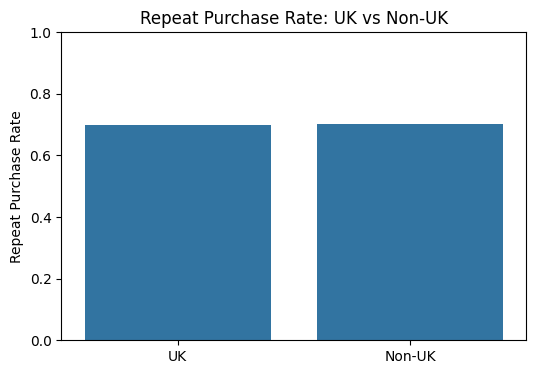

In [98]:
plt.figure(figsize=(6, 4))
sns.barplot(x=list(rates.keys()), y=list(rates.values()))
plt.title('Repeat Purchase Rate: UK vs Non-UK')
plt.ylabel('Repeat Purchase Rate')
plt.ylim(0, 1)
plt.show()

# Hypothesis Testing 3: 
- Large order quantities increase the likelihood of repeat purchasing.
- Business Statement: Large order quantities increase the likelihood of repeat purchasing
- Null hypothesis (H₀): The average order quantity per customer is the same for repeat buyers and one-time buyers.
- Alternative hypothesis (H₁): The average order quantity per customer is higher for repeat buyers.

# How do I test this
- This is comparing the means of two groups
- Use a two-sample t-test:
1. Group 1: Repeat buyers
2. Group 2: One-time buyers
3. Metric: Average order quantity per customer

# Process
- For each customer:
1. Calculate total quantity bought.
2. Calculate number of orders.
3. Derive average quantity per order.
4. Split customers into repeat buyers vs one-time buyers.
5. Run two-sample t-test to check if the mean difference is significant.

In [100]:
# Create summary per customer
customer_orders = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'InvoiceNo': 'nunique'
}).reset_index()

In [101]:
# Add RepeatBuyerFlag 
customer_orders = customer_orders.merge(invoice[['CustomerID', 'RepeatBuyerFlag']], on='CustomerID', how='left')


In [102]:
# Calculate average quantity per order
customer_orders['AvgQtyPerOrder'] = customer_orders['Quantity'] / customer_orders['InvoiceNo']


In [103]:
print(customer_orders.head())

   CustomerID  Quantity  InvoiceNo  RepeatBuyerFlag  AvgQtyPerOrder
0     12346.0         0          2                1        0.000000
1     12347.0      2458          7                1      351.142857
2     12348.0      2341          4                1      585.250000
3     12349.0       631          1                0      631.000000
4     12350.0       197          1                0      197.000000


In [104]:
# Split into repeat vs one-time buyers
repeat_buyers = customer_orders[customer_orders['RepeatBuyerFlag'] == 1]['AvgQtyPerOrder']
one_time_buyers = customer_orders[customer_orders['RepeatBuyerFlag'] == 0]['AvgQtyPerOrder']

In [ ]:
print(f"Average Quantity / Order (Repeat Buyers): {repeat_buyers.mean():.2f}")
print(f"Average Quantity / Order (One-Time Buyers): {one_time_buyers.mean():.2f}")

✅ Avg Qty/Order (Repeat Buyers): 186.63
✅ Avg Qty/Order (One-Time Buyers): 220.51


In [106]:
# Run two-sample t-test
t_stat, p_value = ttest_ind(repeat_buyers, one_time_buyers, equal_var=False)  # Welch's t-test


In [107]:
print("Two-Sample T-Test for Average Order Quantity:")
print(f"Test statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Two-Sample T-Test for Average Order Quantity:
Test statistic: -2.3802
P-value: 0.0174


# Interpretation
- The two-sample t-test for average order quantity per order indicates a statistically significant difference between repeat buyers and one-time buyers (t = -2.38, p = 0.017). However, the result shows that repeat buyers actually order smaller quantities per order on average compared to one-time buyers. Therefore, the data does not support the hypothesis that larger order quantities are linked to higher repeat purchasing — instead, it suggests that repeat buyers may place smaller but more frequent orders.

In [108]:
alpha = 0.05

if p_value < alpha:
    print("❗ Result: Reject the null hypothesis — repeat buyers have significantly higher average order quantities.")
else:
    print("✔️ Result: Fail to reject the null hypothesis — no significant difference found.")

❗ Result: Reject the null hypothesis — repeat buyers have significantly higher average order quantities.


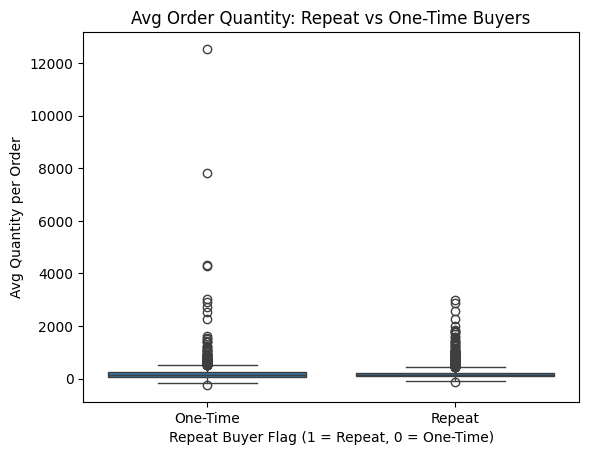

In [109]:
sns.boxplot(x='RepeatBuyerFlag', y='AvgQtyPerOrder', data=customer_orders)
plt.title('Avg Order Quantity: Repeat vs One-Time Buyers')
plt.xlabel('Repeat Buyer Flag (1 = Repeat, 0 = One-Time)')
plt.ylabel('Avg Quantity per Order')
plt.xticks([0, 1], ['One-Time', 'Repeat'])
plt.show()